Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina

**Aluno:** Rodrigo Kobashikawa Rosa<br>
**Matrícula:** 14201073
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 5: SVM

Neste exercício você irá construir classificadores usando máquinas de vetores de suporte (SVM), tando em sua versão linear quanto na versão baseada em kernels.

In [1]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(decision_function, X, margin=True, heatmap=False, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = decision_function(X).reshape(xx1.shape)
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    if margin:
        plt.contourf(xx1,xx2,z,cmap=plt.cm.bwr,vmin=-3,vmax=3,levels=[-1,0,1])
    if heatmap:
        a = np.max(np.abs(z))*2
        plt.contourf(xx1,xx2,z,100,cmap=plt.cm.bwr,vmin=-a,vmax=a)
    return
        
def plot_circles(X):
    if X.shape[1]>0:
        plt.plot(X[:,0],X[:,1],'go',mfc='none',ms=12)
    return

# Conjunto de dados #1

O primeiro conjunto de dados pode ser carregado pelo comando abaixo. Para simplificar, não usaremos conjunto de teste.

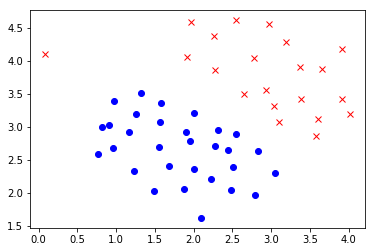

In [2]:
data = loadmat('data/svm1.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

Accuracy: 0.9803921568627451


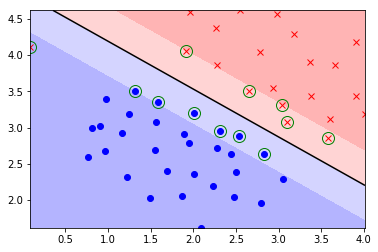

In [3]:
model = SVC(C=1, kernel='linear')
model.fit(X,y)
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

Os círculos no gráfico acima marcam os **vetores de suporte**. Note que, no classificador SVM, o classificador é definido exclusivamente a partir dos vetores de suporte, i.e., as demais amostras de treinamento que satisfazem a margem não tem impacto no classificador.

Varie o valor de $C$ até obter 100% de acurácia. Responda:
- O que acontece com a fronteira de decisão? Por quê? 
- Que interpretação pode ser dada para o parâmetro $C$? 
- O ajuste obtido parece ser adequado? Explique.

## SVM com kernel RBF (gaussiano)

Nesta parte você utilizará um kernel RBF para obter uma fronteira de decisão não-linear.

Em geral, um kernel pode ser interpretado como uma função que mede a **similaridade** entre um par de amostras ($x^{(i)}$, $x^{(j)}$). No caso do kernel RBF, a similaridade é definida como uma função da distância euclidiana entre as amostras, mais precisamente:

$$ K_{\text{RBF}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \gamma \| x^{(i)} - x^{(j)}\|^2 \right) $$

O parâmetro $\gamma$ (um **hiperparâmetro** do modelo) determina quão rápido a similaridade decai com a distância.

Em contraste, o kernel linear não possui hiperparâmetros, sendo definido simplesmente como o produto interno entre amostras:

$$ K_{\text{linear}} \left( x^{(i)}, x^{(j)} \right) = {x^{(i)}}^T x^{(j)} $$

O uso do kernel linear resulta no classificador linear visto anteriormente.

Em qualquer caso, a função de decisão é dada por
$$
z = f(\bx) = \bw^T \bx + b =b + \sum_{i \in \calS} \alpha_i y^{(i)} K(\bx,\bx^{(i)})
$$
onde $\calS$ denota o conjunto de índices dos vetores de suporte. Portanto, a predição é realizada calculando o kernel somente com relação aos vetores de suporte, i.e., apenas a similaridade com relação aos vetores de suporte é relevante.

### Usando o kernel da biblioteca

Refaça a classificação utilizando o kernel `rbf` fornecido na própria função `SVC`, definindo e variando o parâmetro `gamma`. O que você observa? Qual o efeito do parâmetro $\gamma$? Note que esse efeito pode ser melhor visualizado utilizando um valor muito alto para `C` (por exemplo, `C = 1e6`), o que corresponde a um problema praticamente sem regularização.

Caso deseje, você pode utilizar a opção `heatmap=True` na função `plot_boundary` para ajudar na visualização. Nesse caso as regiões mais vermelhas representam um valor de $z$ (discriminante ou função de decisão) mais positivo, enquanto as regiões mais azuis representam um valor de $z$ mais negativo (mas a margem deixa de ser mostrada).

### Implementando seu próprio kernel

Em seguida, implemente o seu próprio kernel RBF usando a função `my_kernel` definida abaixo. Como exemplo, está implementado um kernel linear. 

O kernel customizado pode ser usado na função SVC através do comando:

```python
model = SVC(C=1, kernel=my_kernel)
```

Nesse caso, o parâmetro `gamma` deve ser definido como variável global (externa à função), para que você possa variá-lo, uma vez que a biblioteca sklearn não permite passar argumentos adicionais para a função de kernel customizado (em particular, o parâmetro `gamma` do `SVC` é ignorado para qualquer kernel customizado).

Alternativamente, você pode definir a função de kernel usando uma função anônima:

```python
model = SVC(C=1, kernel=lambda X1, X2: my_kernel(X1,X2,gamma))
```

e definir `gamma` como um argumento adicional de `my_kernel`.

In [4]:
def my_kernel(X1, X2):
    '''
    Computes custom kernel.
    
    Parameters
    ----------
    X1 : array of shape (m1, n_features)
    X2 : array of shape (m2, n_features)
    
    Returns
    -------
    kernel_matrix : array of shape (m1, m2)
    
    '''
    
    kernel_matrix = X1 @ X2.T  
    
    return kernel_matrix

Certifique-se que sua implementação está correta rodando o código abaixo.

In [5]:
x1 = np.array([[1, 2, 1]])
x2 = np.array([[0, 4, -1]])
gamma = 1/8
sim = my_kernel(x1, x2)
if abs(sim - 0.32465246735834973890) < 1e-10: print('OK')

Em seguida, realize novamente a classificação para obter o mesmo resultado anterior.

Após garantir que você conseguiu implementar corretamente um kernel RBF, você pode voltar a usar o kernel da própria função SVC (o qual tem provavelmente uma implementação mais eficiente).

# Conjuntos de dados #2

O próximo conjunto de dados pode ser carregado pelo comando abaixo. Para simplificar, não usaremos conjunto de teste.

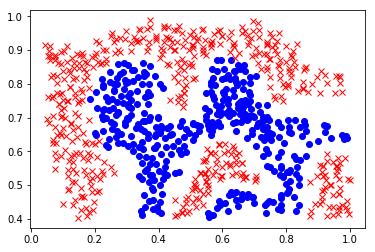

In [6]:
data = loadmat('data/svm2.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

Varie os hiperparâmetros $C$ e $\gamma$ e observe seus efeitos. Tente encontrar valores que forneçam uma explicação aparentemente mais "natural" possível para os dados. Explique o seu raciocínio.

<!-->Em particular, é possível obter 100% de acurácia sem aparentemente incorrer em um overfitting gritante?<-->

Você imagina que seria fácil conseguir o mesmo resultado usando um kernel polinomial (equivalente a uma adição de atributos polinomiais)? Em outras palavras, você observa alguma vantagem em utilizar o kernel RBF? Explique seu raciocínio. Se quiser experimentar, utilize `kernel='poly'`, defina os parâmetros `degree=d`, `gamma='auto'`, `coef0=1` e varie $C$ e $d$.

# Conjuntos de dados #3

O próximo conjunto de dados pode ser carregado pelo comando abaixo. Note que agora utilizaremos dois conjuntos, um de treinamento e outro de validação.

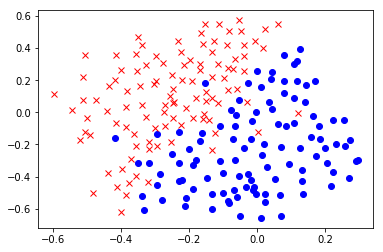

In [7]:
data = loadmat('data/svm3.mat')
X_train, y_train = data['X'], data['y'].reshape(-1)
X_val, y_val = data['Xval'], data['yval'].reshape(-1)
plot_data(X_train,y_train)

Aqui continuaremos utilizando um classificador SVM com kernel RBF. Sua tarefa é determinar os melhores valores dos hiperparâmetros de acordo com o desempenho no conjunto de validação. Em outras palavras, você deve variar $C$ e $\gamma$, sempre treinando o modelo no conjunto de treinamento e medindo o desempenho no conjunto de validação, até encontrar os valores que maximizam a acurácia de validação.

Para isso, você pode definir os conjuntos `range_C` e `range_gamma` e variar $(C,\gamma)$ dentro da grade `range_C` x `range_gamma` (este método é conhecido como [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)), o que pode ser implementado com dois laços `for`. Para ambos $C$ e $\gamma$, é recomendável utilizar valores que seguem uma progressão geométrica, i.e., regularmente espaçados no expoente.

Implemente seu método na função abaixo e em seguida, para os valores encontrados, trace o gráfico da região de decisão (com o conjunto de treinamento) e imprima a acurácia nos conjuntos de treinamento e de validação.

(**Dica:** é possível conseguir uma acurácia de validação de 97%.)

In [8]:
def search_hparams(X, y, X_val, y_val):
    '''
    Finds C and gamma that maximize accuracy on the validation set.

    Parameters
    ----------
    X     : array of shape (m x n) consisting of m training examples.
    y     : array of shape (m, ) consisting of labels for the training data.
    X_val : array of shape (m_val x n) consisting of m_val validation examples.
    y_val : array of shape (m_val, ) consisting of labels for the validation data.
    
    Returns
    -------
    C     : float
    gamma : float
    '''

    return C, gamma

# Conjunto de dados #4

O último conjunto de dados consiste de atributos extraídos de emails marcados como spam ou não-spam. Leia a seção 4.6-4.6.1 do livro do Watt, especialmente o Exemplo 4.9, para se familiar com os atributos utilizados, em particular o modelo _bag-of-words_ (BoW).

O conjunto de dados pode ser baixado de:

https://archive.ics.uci.edu/ml/datasets/spambase

Em particular, os dados estão no arquivo `spambase.data` enquanto os nomes dos atributos estão no arquivo `spambase.names`.

### Classificação com SVM linear

Para este exercício você usará apenas um SVM **linear**. Assim, inicialmente o objetivo será determinar um valor adequado de $C$. Para isto, primeiramente divida o conjunto de dados usando o comando

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)
```

e certifique-se de conseguir o máximo de acurácia no conjunto de teste (pelo menos 91%) com o mínimo de overfitting. 

Porém, ao contrário dos conjuntos de dados anteriores, treinar um SVM com este conjunto de dados pode ser **muito demorado**, dependendo dos parâmetros utilizados. Em particular, o tempo de treinamento aumenta tanto com $C$ quanto com o número de amostras de treinamento. (Por exemplo, usando todas as 3601 amostras de treinamento e $C=0.5$ leva cerca de 2 minutos em um processador i7-7700 3.6 GHz. No entanto, não é necessário usar $C > 0.5$ neste exercício). Assim, para evitar gastar tempo demais com treinamento, é recomendável proceder da seguinte forma:
- Começar testando valores muito pequenos de $C$;
e/ou
- Utilizar inicialmente um conjunto de treinamento reduzido.

Reporte o valor de $C$ encontrado, bem como a acurácia nos dois conjuntos.

### Preditores de SPAM

Uma vez que o modelo utiliza um kernel linear, i.e., trata-se de um classificador linear, podemos determinar quais atributos são mais relevantes para a classificação analisando o vetor de pesos $\bw$. Este pode ser extraído do modelo através do comando

```
model.coef_
```

Sua tarefa é determinar os 15 atributos mais preditivos de spam, informando o nome do atributo conforme descrito no arquivo `spambase.names` (por exemplo, `word_freq_money` certamente está entre eles). Dica: o comando `np.argsort` pode ser útil.

### (OPCIONAL)

- Experimente normalizar os atributos antes da classificação, por exemplo, usando `sklearn.preprocessing.StandardScaler`. Isto altera suas conclusões sobre os preditores de spam? Por quê?
- Analise a faixa de valores dos atributos e observe que os três últimos atributos tem uma escala muito maior que os demais; em particular, possuem uma distribuição extremamente dispersa (verifique usando o comando `plt.hist()`). Aplicar uma transformação logarítmica destes atributos pode torná-los mais "gaussianos". Isto melhora a classificação?

---

# Resolução

## Bibliotecas

In [1]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Plot functions

In [10]:
def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(decision_function, X, margin=True, heatmap=False, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = decision_function(X).reshape(xx1.shape)
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    if margin:
        plt.contourf(xx1,xx2,z,cmap=plt.cm.bwr,vmin=-3,vmax=3,levels=[-1,0,1])
    if heatmap:
        a = np.max(np.abs(z))*2
        plt.contourf(xx1,xx2,z,100,cmap=plt.cm.bwr,vmin=-a,vmax=a)
    return
        
def plot_circles(X):
    if X.shape[1]>0:
        plt.plot(X[:,0],X[:,1],'go',mfc='none',ms=12)
    return

## Conjunto de dados #1

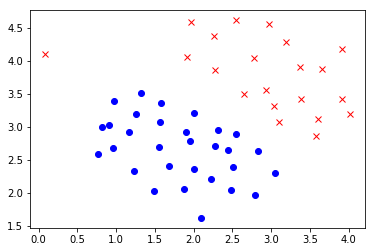

In [11]:
data = loadmat('data/svm1.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

In [12]:
C = np.arange(1,50)
acc_list = [SVC(C=c, kernel='linear').fit(X,y).score(X,y) for c in C]

Buscando o menor valor do parâmetro C para conseguir 100% de acurácia

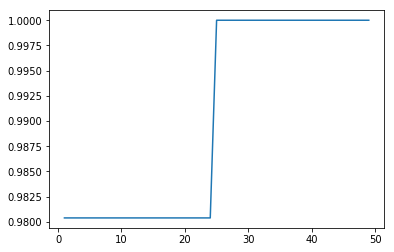

In [13]:
x = np.arange(1,50)
plt.plot(x,acc_list)

In [14]:
acc_list[23],acc_list[24]

(0.9803921568627451, 1.0)

In [15]:
model = SVC(C=25, kernel='linear')
model.fit(X,y)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 1.0


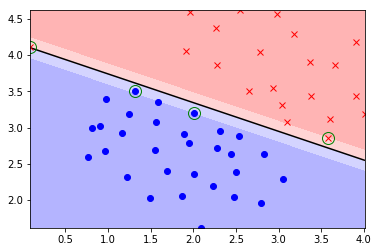

In [16]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

* O que acontece com a fronteira de decisão? Por quê?

A fronteira se ajusta de acordo com o outlier, devido ao aumento do parâmetro C

* Que interpretação pode ser dada para o parâmetro  C?

C é um parâmetro de regularização que expressa a preferência por uma
classificação correta

* O ajuste obtido parece ser adequado? Explique.

A classificação não parece natural com a fronteira de decisão muito mais próxima do conjunto azul do que o vermelho. Houve overfitting devido a sensibilidade do classificador com o outlier

### SVM com kernel RBF (gaussiano)

In [17]:
model = SVC(C=1e6, kernel='rbf')
model.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 1.0


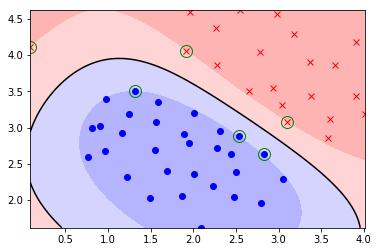

In [18]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

Accuracy: 1.0


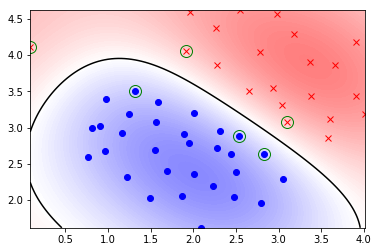

In [19]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X,False,True)
plot_data(X,y)
plot_circles(model.support_vectors_)

In [20]:
gamma_range = np.arange(1,52,10)
model_list = [SVC(C=1e6, kernel='rbf', gamma=g).fit(X,y) for g in gamma_range]

O hiperparâmetro gamma define o quão rápido a similaridade decai com a distância. Observando o comportamento abaixo aumentando gamma, percebe-se que o aumento de gamma resulta em overfitting das amostras.

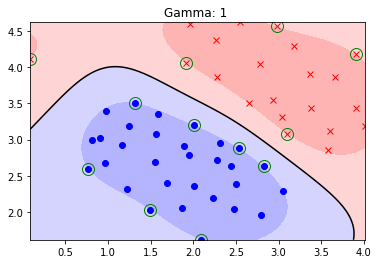

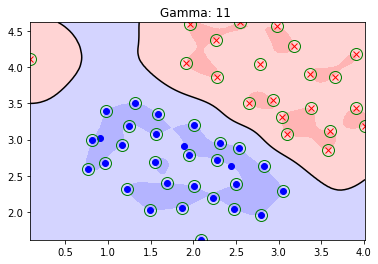

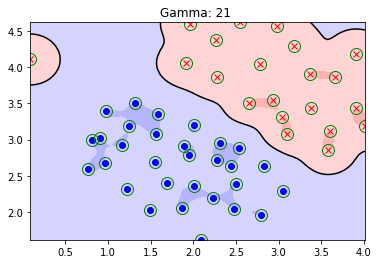

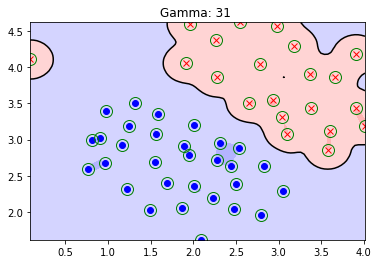

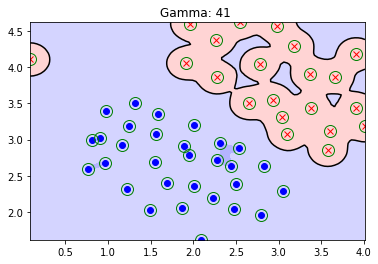

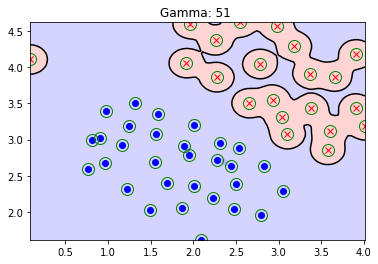

In [21]:
for model in model_list:
    plot_boundary(model.decision_function,X)
    plot_data(X,y)
    plot_circles(model.support_vectors_)
    plt.title("Gamma: %i " % model.gamma)
    plt.show()

### Kernel RBF implementado

In [22]:
def my_kernel(X1, X2):
    '''
    Computes custom kernel.
    
    Parameters
    ----------
    X1 : array of shape (m1, n_features)
    X2 : array of shape (m2, n_features)
    
    Returns
    -------
    kernel_matrix : array of shape (m1, m2)
    
    '''
    kernel_matrix = np.zeros((X1.shape[0],X2.shape[0]))
    for l in range(kernel_matrix.shape[0]):
        kernel_matrix[l] = np.exp(-gamma*np.sum((X1[l]-X2)**2,axis=1))
    
    return kernel_matrix

In [23]:
x1 = np.array([[1, 2, 1]])
x2 = np.array([[0, 4, -1]])
gamma = 1/8
sim = my_kernel(x1, x2)
if abs(sim - 0.32465246735834973890) < 1e-10: print('OK')

OK


In [24]:
gamma = 1
model = SVC(C=1e6, kernel=my_kernel)
model.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function my_kernel at 0x000001697B772488>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

Accuracy: 1.0


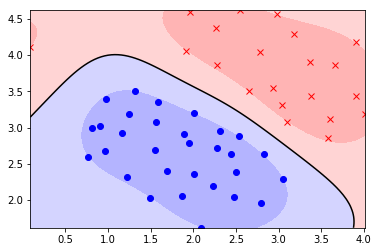

In [25]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

## Conjunto de dados #2

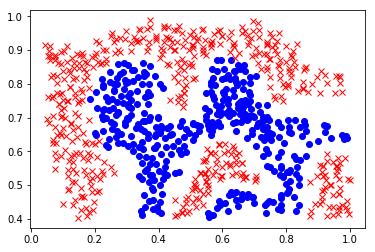

In [26]:
data = loadmat('data/svm2.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

Kernel RBF

Variando os hiperparâmetros, o resultado mais "natural" foi o abaixo. Pois obteve menos vetores de suporte e a margem de decisão aparenta mais simétrica.

In [27]:
model = SVC(C=250, kernel='rbf',gamma=80)
model.fit(X,y)

SVC(C=250, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=80, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 1.0


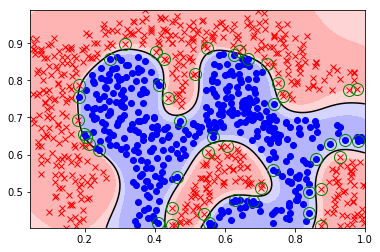

In [28]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

In [29]:
model = SVC(C=1, kernel='rbf',gamma=80)
model.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=80, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 0.9953650057937428


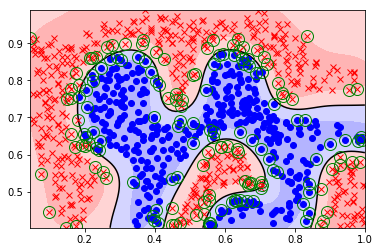

In [30]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

In [31]:
model = SVC(C=1000, kernel='rbf',gamma=1)
model.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 0.8447276940903824


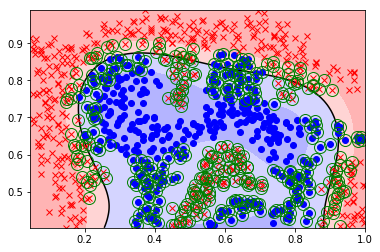

In [32]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

Kernel Polinomial

Tentando usar o kernel polinomial para o mesmo conjunto de dados, observa-se que foi necessário polinômios de grau muito alto e pouca regularização para obter um resultado razoável porém ainda inferior ao rbf. Em comparação ao rbf demorou muito mais para computar devido ao alto grau e o desempenho foi pior.

In [33]:
model = SVC(C=1000, kernel='poly',degree=15,coef0=1)
model.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=15, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 0.9594438006952491


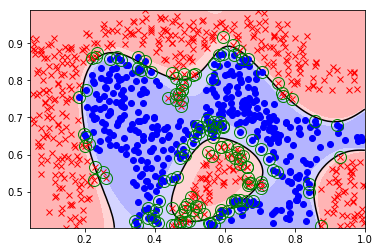

In [34]:
print('Accuracy:',model.score(X,y))
plot_boundary(model.decision_function,X)
plot_data(X,y)
plot_circles(model.support_vectors_)

## Conjunto de dados #3

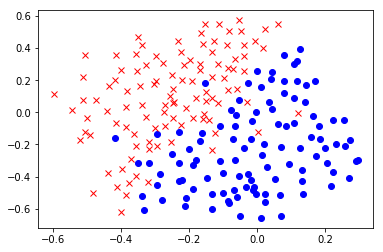

In [35]:
data = loadmat('data/svm3.mat')
X_train, y = data['X'], data['y'].reshape(-1)
X_val, y_val = data['Xval'], data['yval'].reshape(-1)
plot_data(X_train,y_train)

In [36]:
def  search_hparams(X, y, X_val, y_val):
    '''
    Finds C and gamma that maximize accuracy on the validation set.
    
    Parameters
    ----------
    X     : array of shape (m x n) consisting of m training examples.
    y     : array of shape (m, ) consisting of labels for the training data.
    X_val : array of shape (m_val x n) consisting of m_val validation examples.
    y_val : array of shape (m_val, ) consisting of labels for the validation data.
    
    Returns
    -------
    C     : float
    gamma : float
    '''
    acc = 0
    C_range = np.geomspace(1,200,100)
    gamma_range = np.geomspace(1,200,100)
    for c_iter in C_range:
        for g in gamma_range:
            new_acc = SVC(kernel='rbf', C=c_iter, gamma=g).fit(X,y).score(X_val,y_val)
            if new_acc > acc:
                acc = new_acc
                gamma = g
                C = c_iter
                
    return C, gamma, acc

In [37]:
C,gamma,acc = search_hparams(X_train,y_train,X_val,y_val)

In [38]:
C,gamma,acc

(4.241833671385446, 38.06321355312053, 0.97)

In [39]:
model = SVC(C=C, kernel='rbf',gamma=gamma)
model.fit(X_train,y_train)

SVC(C=4.241833671385446, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=38.06321355312053,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Após a varredura de hiperparâmetros, pelo gráfico abaixo observa-se que foi feita uma boa classificação, com margens bem definidas.

Train accuracy: 0.943127962085308
Validation accuracy: 0.97


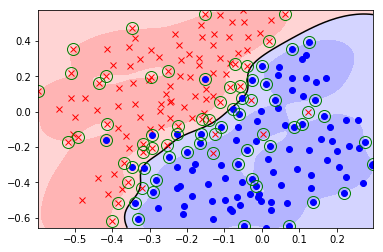

In [40]:
print('Train accuracy:',model.score(X_train,y_train))
print('Validation accuracy:',model.score(X_val,y_val))

plot_boundary(model.decision_function,X_train)
plot_data(X_train,y_train)
plot_circles(model.support_vectors_)

## Conjunto de dados #4

In [47]:
df = pd.read_csv('data/spambase.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [48]:
df2 = pd.read_csv('data/spambase.names',sep = ':',header=None)
df2.head()

,0,1
0,word_freq_make,continuous.
1,word_freq_address,continuous.
2,word_freq_all,continuous.
3,word_freq_3d,continuous.
4,word_freq_our,continuous.


In [49]:
name = df2.values
name = name[:,0].reshape(-1,1)
name.shape

(57, 1)

In [50]:
data = df.values
X = data[:,0:-1]
y = data[:,-1]
X.shape,y.shape

((4601, 57), (4601,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)

In [52]:
model = SVC(C=0.01, kernel='linear')
model.fit(X,y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
print('Accuracy:',model.score(X_train,y_train))

Accuracy: 0.9200222160510969


In [54]:
print('Accuracy:',model.score(X_test,y_test))

Accuracy: 0.906


In [55]:
w = model.coef_
print("w: ",w)

w:  [[-8.32508630e-02  1.45475159e-03  2.68471223e-02  1.14700000e-01
   3.80411882e-01  2.85706186e-01  7.34030178e-01  3.86730526e-01
   2.07522858e-01  3.04163928e-02  1.00132519e-01 -8.71770732e-02
   2.69129318e-02 -1.79662993e-02  9.24408763e-02  5.10570423e-01
   2.90871189e-01  2.26046036e-01  3.38208744e-02  1.73835293e-01
   2.23575667e-01  6.88808346e-02  5.62267712e-01  4.21551074e-01
  -4.67372844e-01 -2.63390052e-01 -5.63344446e-01  4.63556523e-02
  -2.11595644e-01 -1.10416355e-01 -9.67000000e-02 -4.19000000e-02
  -2.13366713e-01 -4.18000000e-02 -1.16344348e-01  1.37964364e-01
  -1.80197635e-01 -5.67000000e-02 -1.67500000e-01 -1.41300000e-01
  -1.60086040e-01 -3.59088156e-01 -9.97503374e-02 -2.34452300e-01
  -2.27073269e-01 -4.67286040e-01 -6.66581776e-02 -1.61224569e-01
  -2.97314942e-01 -7.47437599e-02 -2.40885735e-02  4.56044412e-01
   5.56720522e-01  1.15892733e-01  3.17201232e-02  6.46060276e-03
   1.05610292e-04]]


In [58]:
w_index = np.argsort(w).reshape(-1,1)
print("w_index: ", w_index.T)

w_index:  [[26 24 45 41 48 25 43 44 32 28 36 38 47 40 39 34 29 42 30 11  0 49 46 37
  31 33 50 13 56  1 55  2 12  9 54 18 27 21 14 10  3 53 35 19  8 20 17  5
  16  4  7 23 51 15 52 22  6]]


Os 15 atributos mais preditivos de spam.

In [76]:
spam_sort_list = name[w_index].reshape(-1,1)
spam_sort_list[::-1][:15]

array([['word_freq_remove'],
       ['word_freq_000'],
       ['char_freq_$'],
       ['word_freq_free'],
       ['char_freq_!'],
       ['word_freq_money'],
       ['word_freq_internet'],
       ['word_freq_our'],
       ['word_freq_business'],
       ['word_freq_over'],
       ['word_freq_email'],
       ['word_freq_your'],
       ['word_freq_order'],
       ['word_freq_credit'],
       ['word_freq_technology']], dtype=object)

---

In [59]:
spam_pred = np.c_[name,w_index]
spam_pred

array([['word_freq_make', 26],
       ['word_freq_address', 24],
       ['word_freq_all', 45],
       ['word_freq_3d', 41],
       ['word_freq_our', 48],
       ['word_freq_over', 25],
       ['word_freq_remove', 43],
       ['word_freq_internet', 44],
       ['word_freq_order', 32],
       ['word_freq_mail', 28],
       ['word_freq_receive', 36],
       ['word_freq_will', 38],
       ['word_freq_people', 47],
       ['word_freq_report', 40],
       ['word_freq_addresses', 39],
       ['word_freq_free', 34],
       ['word_freq_business', 29],
       ['word_freq_email', 42],
       ['word_freq_you', 30],
       ['word_freq_credit', 11],
       ['word_freq_your', 0],
       ['word_freq_font', 49],
       ['word_freq_000', 46],
       ['word_freq_money', 37],
       ['word_freq_hp', 31],
       ['word_freq_hpl', 33],
       ['word_freq_george', 50],
       ['word_freq_650', 13],
       ['word_freq_lab', 56],
       ['word_freq_labs', 1],
       ['word_freq_telnet', 55],
       ['word_freq

In [61]:
spam_pred[spam_pred[:,1] < 15]

array([['word_freq_credit', 11],
       ['word_freq_your', 0],
       ['word_freq_650', 13],
       ['word_freq_labs', 1],
       ['word_freq_857', 2],
       ['word_freq_data', 12],
       ['word_freq_415', 9],
       ['word_freq_pm', 14],
       ['word_freq_direct', 10],
       ['word_freq_cs', 3],
       ['word_freq_re', 8],
       ['word_freq_conference', 5],
       ['char_freq_(', 4],
       ['char_freq_[', 7],
       ['capital_run_length_total', 6]], dtype=object)